<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Iván Andrés Arellano Ruelas y Jose Alberto Mayagoitia Gutierrez.

**Fecha:** 21 de octubre del 2021.

**Expediente** : 714383 y 720266.
    
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/IvanArellanoRuelas/SPF_Tarea7_IArellano_JMayagoitia

# Tarea 8: Clase 22

# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

# Código Iván

In [1]:
# Código Iván 

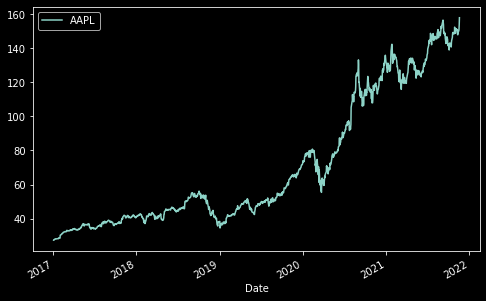

In [3]:
plt.style.use(['dark_background'])

ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [4]:
closes_aapl.iloc[-1]

Symbols
AAPL    157.87
Name: 2021-11-18 00:00:00, dtype: float64

In [5]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

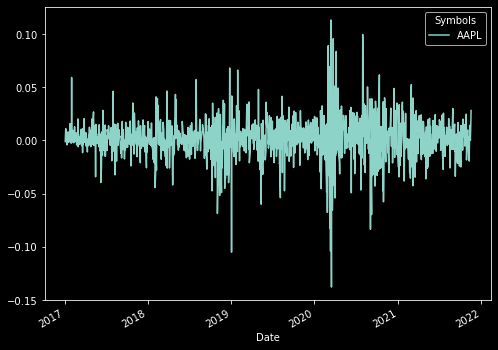

In [6]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [8]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-1.119e-03
2017-01-05,5.085e-03
2017-01-06,1.115e-02
2017-01-09,9.160e-03
2017-01-10,1.008e-03
...,...
2021-11-12,1.434e-02
2021-11-15,6.663e-05
2021-11-16,6.667e-03


In [9]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-02-18'

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-18', '2021-11-19', '2021-11-22', '2021-11-23',
                '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29',
                '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
                '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
                '2021-12-10', '2021-12-13', '2021-12-14', '2021-12-15',
                '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
                '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
                '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
                '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
                '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
                '2022-01-13', '2022-01-14', '2022-01-17', '2022-01-18',
                '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-24',
                '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
                '2022-01-31', '2022-02-01', '2022-02-02', '2022-

In [10]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,9997,9998,9999
2021-11-18,-7.775e-03,3.670e-03,9.670e-03,...,1.209e-02,1.505e-02,9.249e-03
2021-11-19,-2.261e-04,6.931e-05,1.099e-04,...,-6.688e-05,-2.553e-05,1.534e-04
2021-11-22,-3.215e-06,1.340e-06,-2.614e-07,...,5.796e-07,5.267e-07,1.008e-06
2021-11-23,7.971e-08,-4.226e-08,-4.661e-09,...,-1.011e-08,-2.736e-09,5.888e-09
2021-11-24,-2.026e-09,-2.721e-10,-5.328e-11,...,1.129e-10,2.305e-11,1.546e-10
...,...,...,...,...,...,...,...
2022-02-14,5.003e-129,-1.949e-124,-1.653e-120,...,1.838e-130,2.718e-129,8.052e-124
2022-02-15,-2.026e-131,1.527e-126,2.515e-122,...,-2.626e-132,6.438e-131,-1.038e-125
2022-02-16,2.153e-133,2.050e-128,7.570e-125,...,7.661e-134,-2.154e-132,-1.521e-127
2022-02-17,-7.655e-135,7.079e-130,3.829e-128,...,1.241e-135,-1.730e-134,2.351e-129


# Código Jose

In [ ]:
# Código Jose